In [1]:
titanic <- read.csv("titanic3.csv")

In [2]:
head(titanic)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [3]:
str(titanic)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex      : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : Factor w/ 929 levels "110152","110413",..: 188 50 50 50 50 125 93 16 77 826 ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked : Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...
 $ boat     : Factor w/ 28 levels "","1","10","11",..: 13 4 1 1 1 14 3 1 28 1 ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: Factor w/ 370 levels "","?Havana, Cuba",..: 310 232 232 232 232 238 163 25 23 230 ...


In [4]:
titanic$survived <- factor(titanic$survived, levels = c(0, 1), labels = c("dead", "survived"))

In [5]:
titanic$pclass <- as.factor(titanic$pclass)

In [6]:
titanic$name <- as.character(titanic$name)
titanic$ticket <- as.character(titanic$ticket)
titanic$cabin <- as.character(titanic$cabin)

In [7]:
levels(titanic$embarked)

[1] ""  "C" "Q" "S"

In [8]:
table(titanic$embarked)


      C   Q   S 
  2 270 123 914 

In [9]:
levels(titanic$embarked)[1] <- NA
levels(titanic$embarked)

[1] "C" "Q" "S"

In [10]:
table(titanic$embarked)


  C   Q   S 
270 123 914 

In [11]:
table(titanic$embarked, useNA = "always")


   C    Q    S <NA> 
 270  123  914    2 

In [12]:
titanic$cabin <- ifelse(titanic$cabin == "", NA, titanic$cabin)

In [13]:
titanic <- titanic[, !names(titanic) %in% c("boat", "body", "home.dest")]

In [14]:
library(caret)
set.seed(137)
test_idx <- createDataPartition(titanic$survived, p = 0.1)$Resample1

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [15]:
titanic.test <- titanic[test_idx, ]
titanic.train <- titanic[-test_idx, ]

In [16]:
NROW(titanic.test)

[1] 131

In [17]:
prop.table(table(titanic.test$survived))


     dead  survived 
0.6183206 0.3816794 

In [18]:
NROW(titanic.train)

[1] 1178

In [19]:
prop.table(table(titanic.train$survived))


     dead  survived 
0.6179966 0.3820034 

In [20]:
save(titanic, titanic.test, titanic.train, file = "titanic.RData")

In [21]:
createFolds(titanic.train$survived, k = 10)

$Fold01
  [1]   13   23   27   30   36   42   49   62   67  116  126  139  146  148  150
 [16]  157  161  176  189  229  230  247  264  268  271  277  314  318  321  325
 [31]  335  337  362  380  404  407  408  425  428  430  455  456  466  471  473
 [46]  474  476  477  479  532  536  550  553  557  565  566  575  594  596  628
 [61]  646  697  703  718  734  743  758  764  770  797  808  827  835  841  861
 [76]  864  869  871  877  880  882  883  891  914  925  927  929  940  941  942
 [91]  965  983  993  999 1011 1017 1018 1023 1026 1045 1059 1060 1066 1071 1074
[106] 1088 1092 1098 1104 1113 1115 1132 1133 1134 1139 1141 1143 1149

$Fold02
  [1]    8   24   31   39   41   66  106  107  109  110  112  121  140  151  159
 [16]  160  169  180  184  210  215  258  262  296  300  306  317  343  364  367
 [31]  368  373  398  400  402  410  418  435  440  449  482  488  492  494  502
 [46]  505  525  527  530  541  544  572  588  593  598  604  605  606  612  621
 [61]  632  645  660  666  681  691  699  706  708  711  740  773  783  785  786
 [76]  805  814  816  840  846  852  859  897  900  904  943  949  951  956  962
 [91]  968  974  975  987 1003 1015 1027 1031 1043 1082 1090 1093 1096 1099 1103
[106] 1105 1109 1112 1123 1124 1125 1127 1131 1150 1153 1157 1160 1164

$Fold03
  [1]   11   16   29   44   50   59   64   82   87   98  108  117  123  125  130
 [16]  134  138  163  166  186  188  194  219  225  227  240  242  245  254  256
 [31]  257  266  267  269  273  274  282  294  311  315  324  354  378  379  390
 [46]  392  412  441  446  469  470  483  501  506  514  538  551  563  568  578
 [61]  580  584  603  608  613  640  642  648  663  667  670  676  680  696  701
 [76]  713  724  727  730  733  737  739  765  787  803  831  845  857  862  873
 [91]  876  879  884  938  980  989 1000 1008 1009 1020 1028 1035 1039 1055 1056
[106] 1058 1079 1091 1095 1106 1111 1114 1116 1118 1119 1128 1173

$Fold04
  [1]    5   17   20   26   37   38   45   51   57  102  104  120  128  136  145
 [16]  155  156  164  170  177  185  198  202  205  216  222  223  248  253  280
 [31]  285  292  293  295  298  319  326  329  339  341  346  353  365  385  405
 [46]  422  439  457  459  481  507  508  522  569  570  573  581  590  601  624
 [61]  627  629  633  637  639  654  655  661  669  678  683  685  687  689  704
 [76]  735  746  749  750  751  757  759  761  768  774  775  776  801  807  818
 [91]  832  849  851  855  858  875  902  907  921  933  937  954  955  958  972
[106]  976 1024 1030 1038 1044 1063 1068 1072 1129 1147 1162 1176 1177

$Fold05
  [1]    4   40   60   70   71   77   81   86   89   93  100  105  118  129  131
 [16]  147  149  153  175  181  197  200  212  217  220  221  250  281  289  291
 [31]  302  331  345  347  348  356  358  359  363  374  384  386  391  399  406
 [46]  409  411  423  434  462  472  480  503  511  528  534  535  539  554  559
 [61]  562  583  611  614  617  619  626  643  647  649  651  668  671  684  707
 [76]  715  717  729  753  755  756  760  766  777  779  788  791  802  815  817
 [91]  823  850  854  866  874  888  896  906  923  924  930  947  948  959  969
[106]  978  991  997 1001 1016 1019 1054 1076 1080 1084 1122 1152 1174

$Fold06
  [1]    2   15   21   34   46   53   79   80   90   91   96  103  113  135  141
 [16]  182  191  192  196  201  208  241  249  263  275  307  308  313  322  327
 [31]  336  352  360  371  372  382  394  416  419  433  443  444  451  453  458
 [46]  463  464  468  487  489  493  495  524  533  537  545  558  561  564  586
 [61]  589  592  595  615  630  641  652  656  679  686  698  700  702  714  741
 [76]  763  778  800  820  826  830  836  839  847  886  895  911  915  936  953
 [91]  966  967  981  982  986 1005 1014 1022 1025 1033 1034 1037 1046 1047 1049
[106] 1062 1078 1081 1097 1100 1101 1108 1146 1156 1158 1159 1161 1172

$Fold07
  [1]    9   14   35   83   84   88  124  127  154  162  167  174  178  179  203
 [16]  204  235  238  259  270  28

In [22]:
create_ten_fold_cv <- function() {
    set.seed(137)
    lapply(createFolds(titanic.train$survived, k = 10), function(idx) {
        return(list(train = titanic.train[-idx, ],
                   validation = titanic.train[idx, ]))
    })
}

x <- create_ten_fold_cv()
str(x)

List of 10
 $ Fold01:List of 2
  ..$ train     :'data.frame':	1060 obs. of  11 variables:
  .. ..$ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ survived: Factor w/ 2 levels "dead","survived": 2 1 1 1 2 2 1 1 2 2 ...
  .. ..$ name    : chr [1:1060] "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)" ...
  .. ..$ sex     : Factor w/ 2 levels "female","male": 2 1 2 1 2 1 2 2 1 2 ...
  .. ..$ age     : num [1:1060] 0.92 2 30 25 48 63 39 71 26 80 ...
  .. ..$ sibsp   : int [1:1060] 1 1 1 1 0 1 0 0 0 0 ...
  .. ..$ parch   : int [1:1060] 2 2 2 2 0 0 0 0 0 0 ...
  .. ..$ ticket  : chr [1:1060] "113781" "113781" "113781" "113781" ...
  .. ..$ fare    : num [1:1060] 151.6 151.6 151.6 151.6 26.6 ...
  .. ..$ cabin   : chr [1:1060] "C22 C26" "C22 C26" "C22 C26" "C22 C26" ...
  .. ..$ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 1 3 3 ...
  ..$ validation:'d

In [23]:
head(x$Fold01$train)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,1,survived,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
3,1,dead,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
4,1,dead,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
5,1,dead,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
6,1,survived,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
7,1,survived,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S


In [43]:
library(Hmisc)
data <- create_ten_fold_cv()[[1]]$train

In [45]:
summary(survived ~ pclass + sex + age + sibsp + parch + fare + embarked, 
       data = data, method = "reverse")



Descriptive Statistics by survived

+------------+----+-----------------------+-----------------------+
|            |N   |dead                   |survived               |
|            |    |(N=655)                |(N=405)                |
+------------+----+-----------------------+-----------------------+
|pclass : 1  |1060|       15%  ( 99)      |       40%  (163)      |
+------------+----+-----------------------+-----------------------+
|    2       |    |       20%  (131)      |       23%  ( 93)      |
+------------+----+-----------------------+-----------------------+
|    3       |    |       65%  (425)      |       37%  (149)      |
+------------+----+-----------------------+-----------------------+
|sex : male  |1060|       85%  (557)      |       34%  (137)      |
+------------+----+-----------------------+-----------------------+
|age         | 843|   21.00/28.00/39.25   |   19.00/27.00/36.00   |
+------------+----+-----------------------+-----------------------+
|sibsp : 0

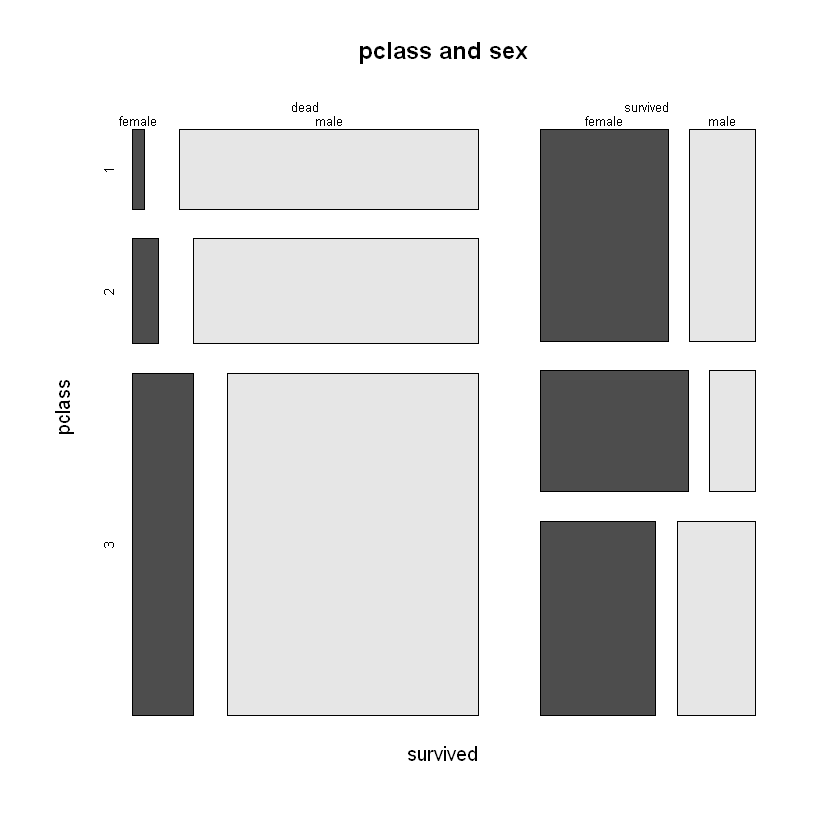

In [46]:
mosaicplot(survived ~ pclass + sex, data = data, color = TRUE, main = "pclass and sex")

In [47]:
xtabs(~ sex + pclass, data = data)

        pclass
sex        1   2   3
  female 112  82 172
  male   150 142 402